# Desc

<b>The dataset is very unbalanced. </b> For example, C3S4 and C3S4 classes have only one sample. This situation is not good in respect of  using the oversampling methods. <br>

I tried to create a new class (called the other) by combining other classes which have a small sample size.
Finally, there are six classes to classify, named 'C2S1', 'C3S1', 'C3S2', 'C4S1', 'C4S2', 'Other'.


## Results

I have used optima for optimizing the model. The results were not very good. Although our model gained reasonable precision/recall scores in a few classes, some classes have bad scores.<br>

- (Test Set) R2 score : 82.851
- (Test Set) MAE : 0.207831

| class        	| precision 	| recall 	| f1-score 	| support 	|
|--------------	|-----------	|--------	|----------	|---------	|
| 0            	| 1.00      	| 0.97   	| 0.99     	| 76      	|
| 1            	| 0.97      	| 0.99   	| 0.98     	| 204     	|
| 2            	| 0.25      	| 0.17   	| 0.20     	| 6       	|
| 3            	| 0.88      	| 0.88   	| 0.88     	| 26      	|
| 4            	| 0.73      	| 0.67   	| 0.70     	| 12      	|
| 5            	| 0.62      	| 0.62   	| 0.62     	| 8       	|
| accuracy     	|           	|        	| 0.94     	| 332     	|
| macro avg    	| 0.74      	| 0.72   	| 0.73     	| 332     	|
| weighted avg 	| 0.94      	| 0.94   	| 0.94     	| 332     	|

# Install

In [226]:
# !pip install catboost
# !pip install scikit-learn
# !pip install seaborn
# !pip install numpy
# !pip install pandas
# !pip install mealpy
# !pip install pyswarms
# !pip install imbalanced-learn
# !pip install jupyterlab
# !pip install jupyter_http_over_ws
# !pip install xgboost
# # !pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_2.0.0/xgboost-2.0.1%2Ba408254c2f0c4a39a04430f9894579038414cb31-py3-none-manylinux2014_x86_64.whl
# # !pip install --upgrade --no-cache-dir gdown
# # !jupyter serverextension enable --py jupyter_http_over_ws

# Code

In [227]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool

## <span style="color:#e74c3c;"> Reading </span> Data


In [228]:
# !gdown 1SaxJ8KPMrV37ZsVTv5F5ava5aXtGRiSn
# !gdown 1E6BZ-AEncUOWlsK96SFz5wBK8w7XjmVB
# !gdown 195J88Onvr23J8HdFtO3D_Yezi97clcZ9
# !gdown 1C4ERjxVqEnxTGxwQVz98u3gaxA_hnzrH
# !gdown 10KFETqq39CXdFP2zTqPgRKOGqFuVlhL9
# !gdown 1I5c33LgqPIjtSFAThzIYFYllWgrzNTT0
# !gdown 1S6YYB6ew3CdlIT8YtMCLw-g0WJlmV6D1
# !gdown 1Xnhm2FD-mDuX6AQ-Nqs-OHd5s5zWyn3e
# !gdown 1oykno6YaFS6Fx9G8sI4RlqVnu36x693F
# !gdown 1wDqaIzte9f5KLfEOTa0r9a6QrKZ34_Yx

In [229]:
# Reading data

data1 = pd.read_csv('./ground_water_quality_2018_post.csv')
data2 = pd.read_csv('./ground_water_quality_2019_post.csv')
data3 = pd.read_csv('./ground_water_quality_2020_post.csv')
data4 = pd.read_csv('./ground_water_quality_2020_post.csv')
data5 = pd.read_csv('./ground_water_quality_2020_post.csv')
data6 = pd.read_csv('./ground_water_quality_2018_pre.csv')
data7 = pd.read_csv('./ground_water_quality_2019_pre.csv')
data8 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data9 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data10 = pd.read_csv('./ground_water_quality_2020_pre.csv')

## Pre Processing

In [230]:

data2.rename( columns ={ 'EC' : 'E.C', 'CO_-2 ' : 'CO3', 'HCO_ - ' :'HCO3', 'Cl -' : 'Cl',
                        'F -' : 'F', 'NO3- ': 'NO3 ' , 'SO4-2':'SO4' , 'Na+':'Na', 'K+':'K',
                        'Ca+2' : 'Ca', 'Mg+2':'Mg'}, inplace = True)

# Create a list of column names to drop
columns_to_drop = ['sno', 'season', 'Unnamed: 8']
list_data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Loop through your dataframes and drop the columns if they exist
for df in list_data:
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

# creating new columns
data1['year'] = 2018
data2['year'] = 2019
data3['year'] = 2020
data4['year'] = 2021
data5['year'] = 2022
data6['year'] = 2018
data7['year'] = 2019
data8['year'] = 2020
data9['year'] = 2021
data10['year'] = 2022



# handling and fixing outliers
data3['pH'].iloc[261] = data3['pH'].iloc[261].replace('8..05', '8.05')
data3['pH'] = data3['pH'].apply(pd.to_numeric)

for df in list_data:
    df['Classification'] = df['Classification'].replace(['O.G'], 'OG')

In [231]:
data_full = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 0)
data_full.to_csv('ground_water_merge.csv', index=False)

In [232]:
len(data_full)

3645

In [233]:
# creating and applying the new_class function

def new_class(X):
    # if (X == 'C3S4') | (X == 'C2S2') | (X == 'C4S4') | (X == 'C3S3') | (X == 'C4S3') | (X == 'OG')  | (X == 'C1S1')  :
    if (X == 'C1S1'):
        return 'Sangat Baik'
    elif (X == 'C1S2') | (X == 'C2S1') | (X == 'C2S2'):
        return 'Baik'
    elif (X == 'C1S3') | (X == 'C3S1'):
        return 'Boleh Digunakan'
    elif (X == 'C2S3') | (X == 'C3S2') | (X == 'C3S3'):
        return 'Marginal'
    elif (X == 'C1S4') | (X == 'C2S4') | (X == 'C3S4') | (X == 'C4S1') | (X == 'C4S2'):
        return 'Buruk'
    elif  (X == 'C4S3') | (X == 'C4S4') :
        return 'Sangat Buruk'
    elif ( X == 'OG') | (X == "BELOW THE GRAPH") :
        return 'Other'
    else:
        return X

data_full['Classification'] = data_full['Classification'].apply(new_class)

In [234]:
def rsc_class(x):
    if x < 1.25:
        return 2
    elif 1.25 <= x <= 2.5:
        return 1
    else:
        return 0

data_full['rsc_class'] = data_full['RSC  meq  / L'].apply(rsc_class)

In [235]:
def tds_class(x):
    if x < 1000:
        return 5
    elif 1000 <= x < 3000:
        return 4
    elif 3000 <= x < 5000:
        return 3
    elif 5000 <= x < 7000:
        return 2
    elif 7000 <= x < 10000:
        return 1
    else:
        return 0

data_full['tds_class'] = data_full['TDS'].apply(tds_class)

In [236]:
# cols2drop = ['district','mandal', 'village', 'lat_gis', 'long_gis', 'Classification.1', 'Unnamed: 8']
cols2drop = ['district', 'mandal', 'village', 'Classification.1', 'temp_id', 'E.C', 'TDS', 'T.H']
# cols2drop = ['Classification.1', 'Unnamed: 8']
data_full_copy = data_full
data_full = data_full[data_full['Classification'] != 'Other']
data_full = data_full[data_full['pH'] != "Sample Leaked Out"]
data_full['pH'] = data_full['pH'].replace('8..05', '8.05')
data_full['pH'] = data_full['pH'].apply(pd.to_numeric)

data_full = data_full.drop(cols2drop, axis=1)

In [237]:
len(data_full)

3630

In [238]:
class_distribution = data_full['Classification'].value_counts()
# check class distribution
print(class_distribution)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64


In [239]:
# total null elements
data_full.isnull().sum()[data_full.isnull().sum() > 0]

gwl                48
CO3               161
HCO3                1
Cl                  1
F                   1
NO3                 1
SO4                 1
Na                  1
K                   1
Ca                  1
Mg                  1
SAR                 1
Classification      1
RSC  meq  / L       1
dtype: int64

In [240]:
# imputing null values

imp_knn = KNNImputer(n_neighbors=3)

data_full['CO3'] = imp_knn.fit_transform(np.array(data_full['CO3']).reshape(-1,1) )
data_full['gwl'] = imp_knn.fit_transform(np.array(data_full['gwl']).reshape(-1,1) )

In [241]:
data_full.isnull().sum()[data_full.isnull().sum() > 0]

HCO3              1
Cl                1
F                 1
NO3               1
SO4               1
Na                1
K                 1
Ca                1
Mg                1
SAR               1
Classification    1
RSC  meq  / L     1
dtype: int64

In [242]:
data_full = data_full.dropna()

In [243]:
data_full.head()

,lat_gis,long_gis,gwl,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR,Classification,RSC meq / L,year,rsc_class,tds_class
0,19.668300,78.524700,5.09,8.28,0.0,220.0,60.0,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,1.273328,Baik,-1.198684,2018,2,5
1,19.458888,78.350833,5.10,8.29,0.0,230.0,80.0,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,0.913166,Boleh Digunakan,-3.397862,2018,2,5
2,19.525555,78.512222,4.98,7.69,0.0,200.0,30.0,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,1.319284,Baik,-0.398684,2018,2,5
3,19.730555,78.640000,5.75,8.09,0.0,160.0,10.0,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,0.928155,Baik,0.000658,2018,2,5
4,19.495665,78.852654,2.15,8.21,0.0,300.0,340.0,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,5.682664,Buruk,-4.396875,2018,2,4


array([[<Axes: title={'center': 'lat_gis'}>,
        <Axes: title={'center': 'long_gis'}>,
        <Axes: title={'center': 'gwl'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'CO3'}>,
        <Axes: title={'center': 'HCO3'}>, <Axes: title={'center': 'Cl'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'NO3 '}>,
        <Axes: title={'center': 'SO4'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'SAR'}>,
        <Axes: title={'center': 'RSC  meq  / L'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rsc_class'}>,
        <Axes: title={'center': 'tds_class'}>, <Axes: >]], dtype=object)

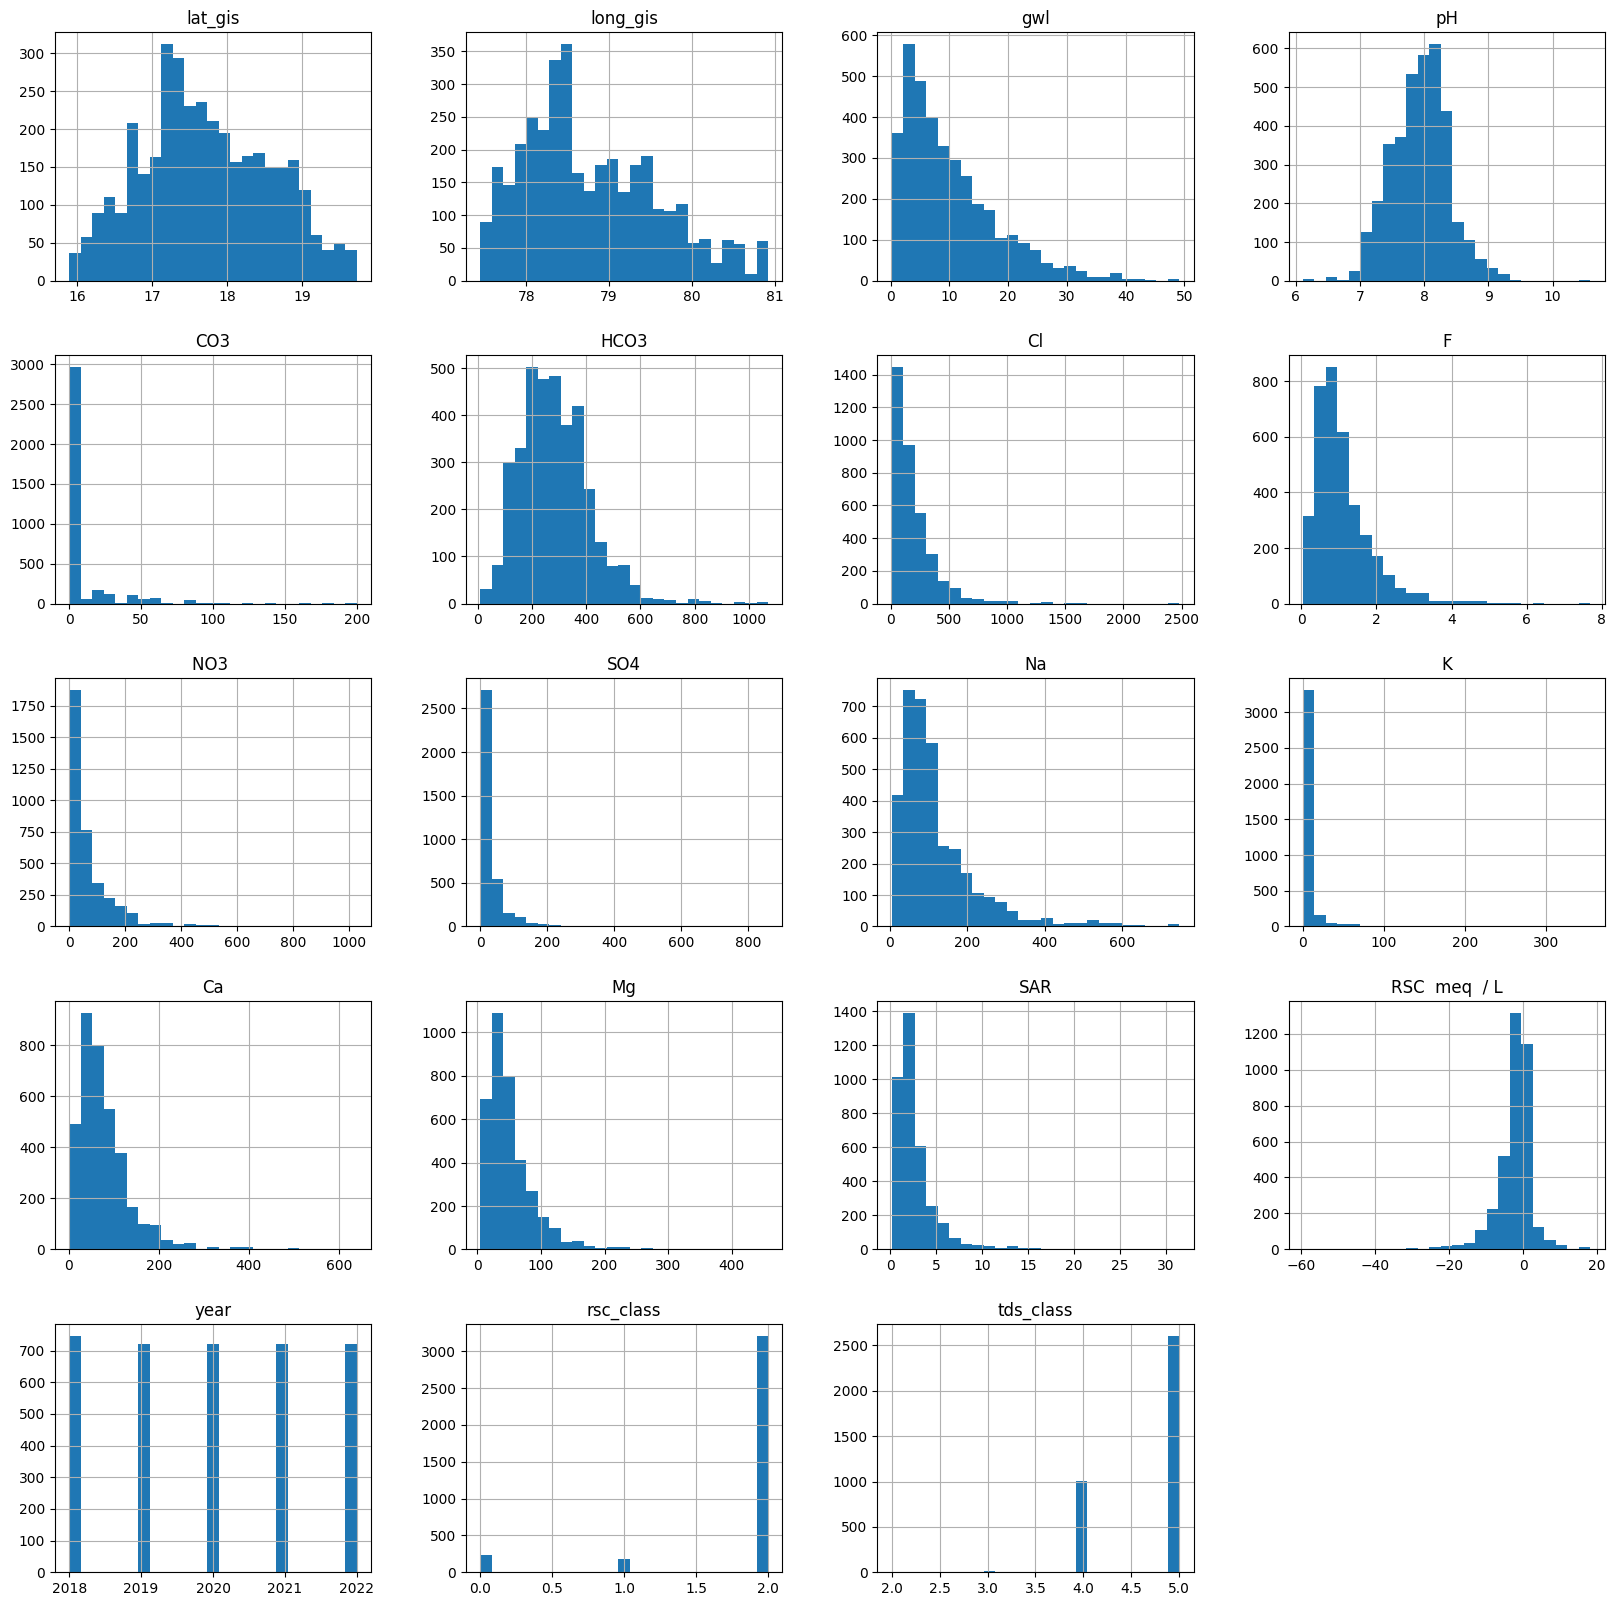

In [244]:
data_full.hist(bins=25,figsize=(20,20))

<Axes: >

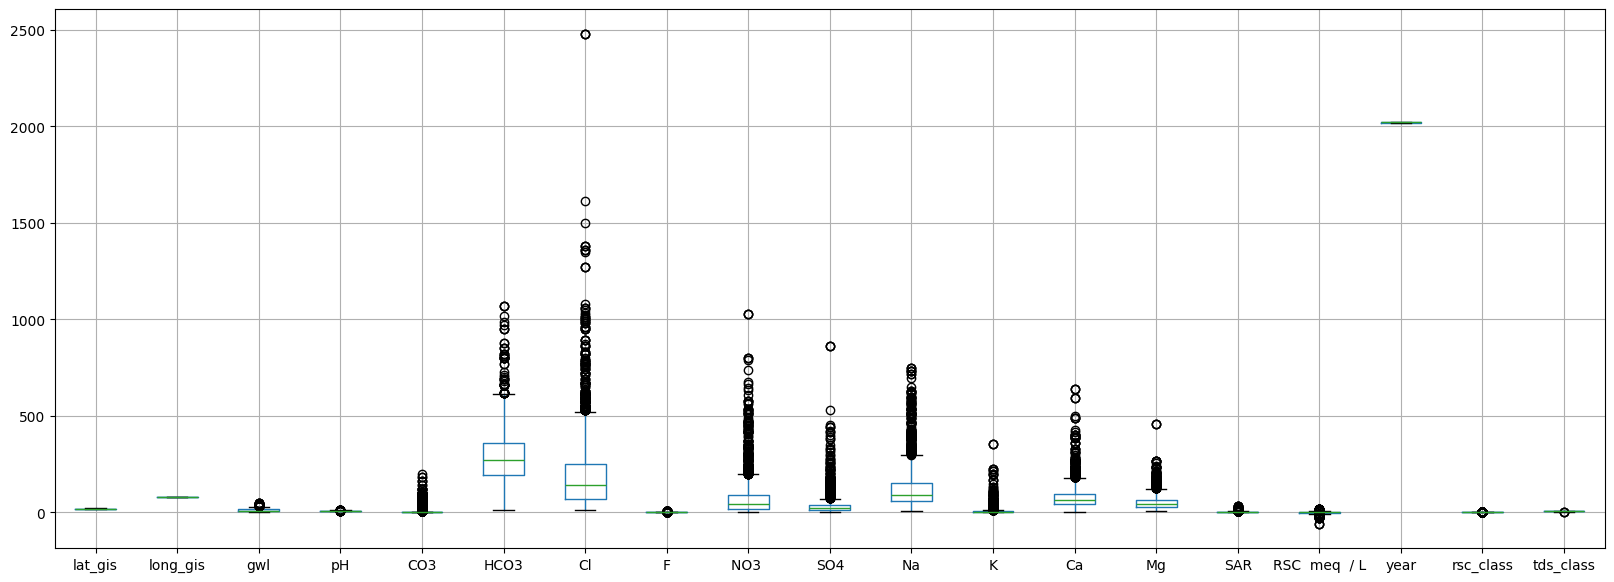

In [245]:
data_full.boxplot(figsize=(20,7))

In [246]:
data_copy=data_full.copy()
data_copy=data_copy.drop(columns="Classification")

In [247]:
Q1 =data_copy.quantile(0.25)
Q3 = data_copy.quantile(0.75) 
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers for each feature
outliers = ((data_copy< lower_bound) | (data_copy> upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Display the number of outliers for each feature
print("Number of Outliers:")
print(outlier_counts)

Number of Outliers:
lat_gis            0
long_gis           0
gwl              114
pH                40
CO3              823
HCO3              55
Cl               204
F                171
NO3              271
SO4              362
Na               214
K                385
Ca               220
Mg               165
SAR              253
RSC  meq  / L    306
year               0
rsc_class        418
tds_class          3
dtype: int64


In [248]:
data_full.columns

Index(['lat_gis', 'long_gis', 'gwl', 'pH', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ',
       'SO4', 'Na', 'K', 'Ca', 'Mg', 'SAR', 'Classification', 'RSC  meq  / L',
       'year', 'rsc_class', 'tds_class'],
      dtype='object')

In [249]:
import numpy as np

data_full["gwl"] = np.sqrt(data_full["gwl"])
columns_to_transform = ["CO3","HCO3","F","NO3 ","Na","Mg"]
data_full[columns_to_transform] = np.cbrt(data_full[columns_to_transform])

columns_to_transform = ["Cl","SO4","K","Ca","SAR"]
data_full[columns_to_transform] = np.log10(data_full[columns_to_transform])

array([[<Axes: title={'center': 'lat_gis'}>,
        <Axes: title={'center': 'long_gis'}>,
        <Axes: title={'center': 'gwl'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'CO3'}>,
        <Axes: title={'center': 'HCO3'}>, <Axes: title={'center': 'Cl'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'NO3 '}>,
        <Axes: title={'center': 'SO4'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'SAR'}>,
        <Axes: title={'center': 'RSC  meq  / L'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rsc_class'}>,
        <Axes: title={'center': 'tds_class'}>, <Axes: >]], dtype=object)

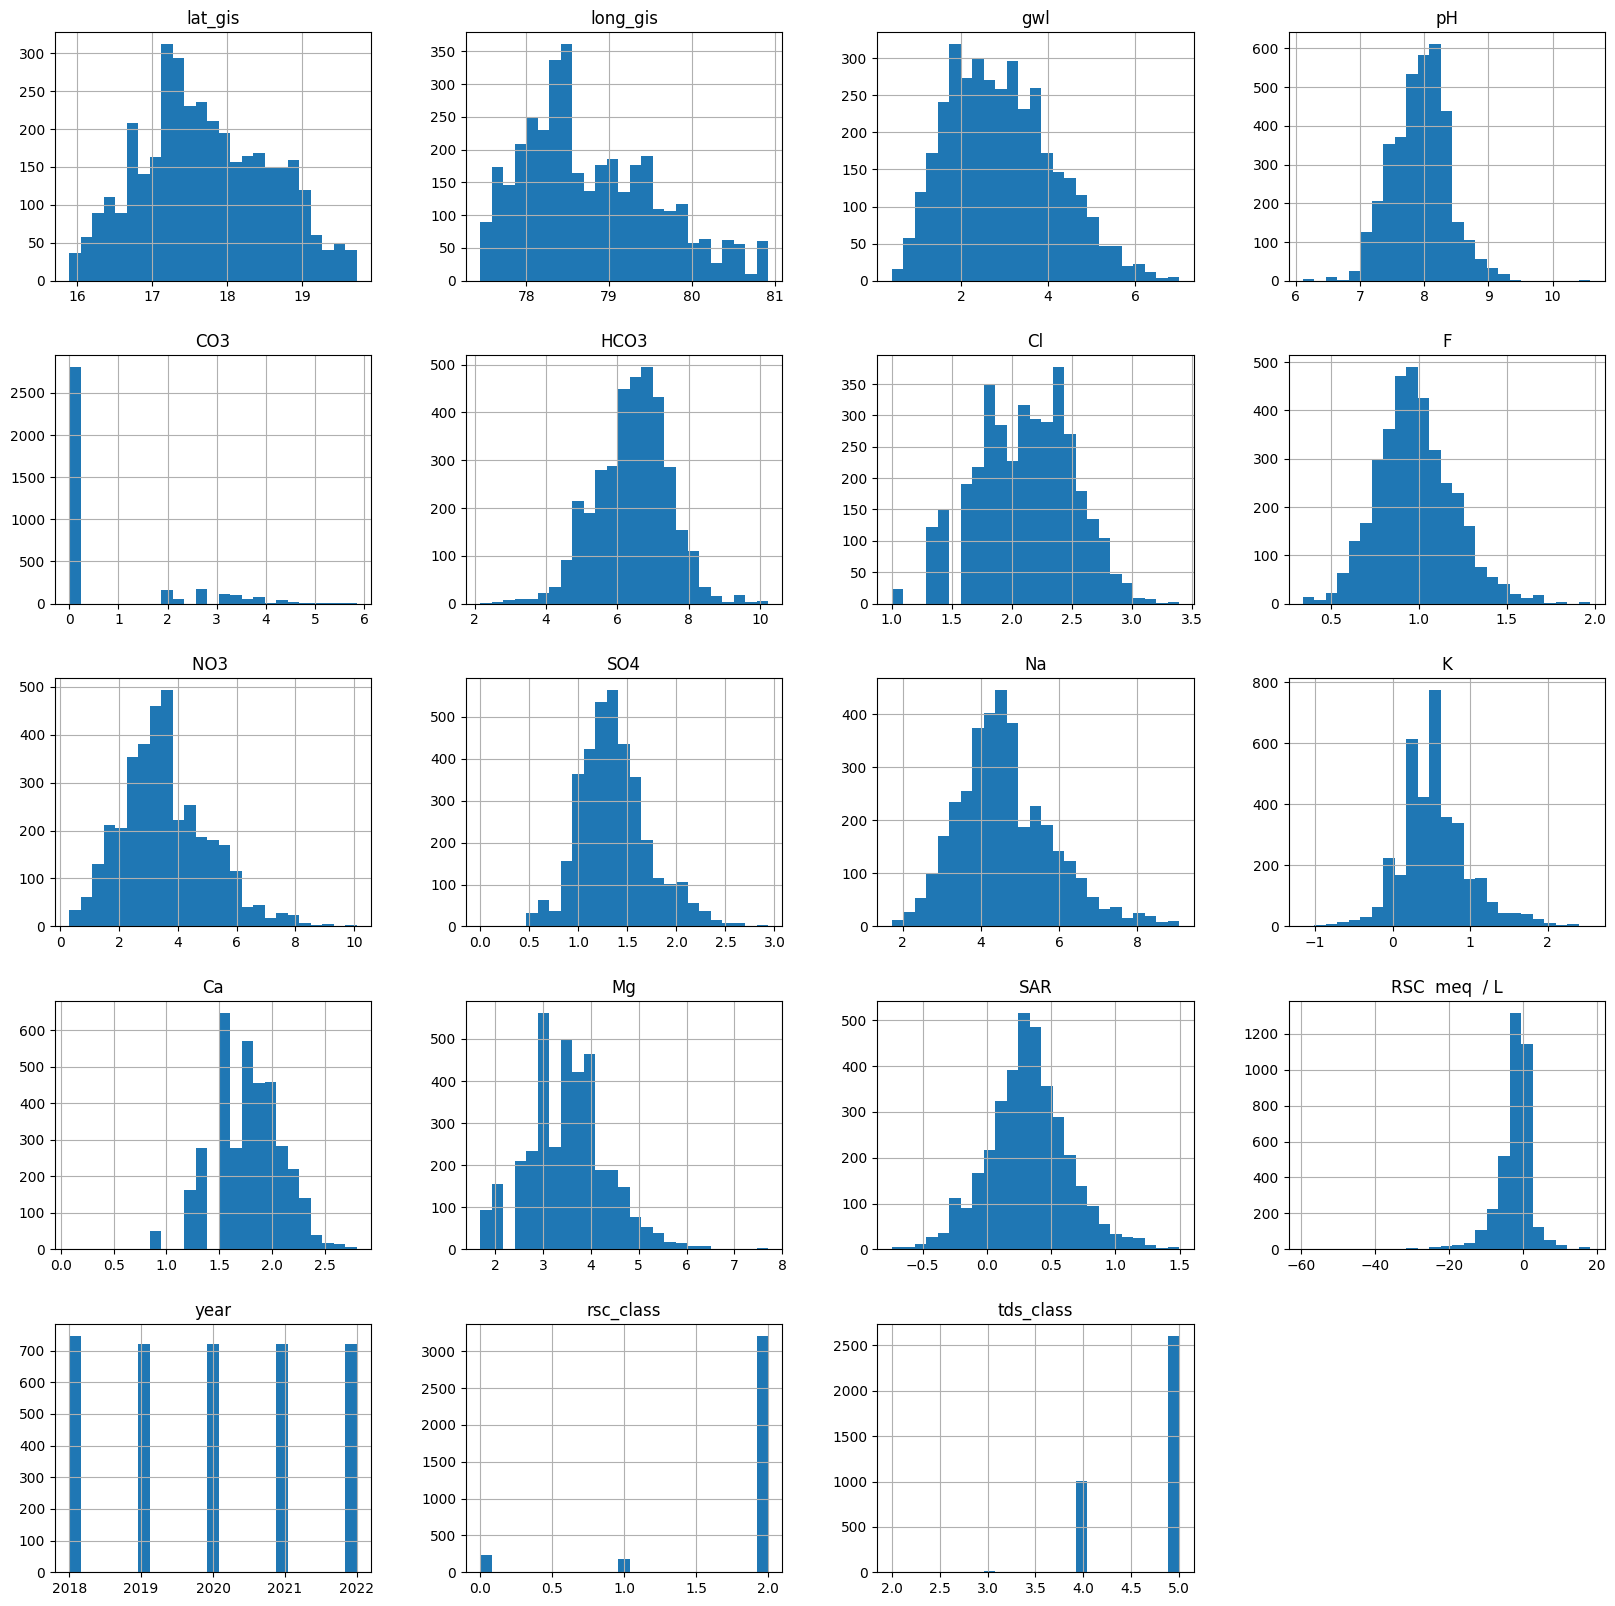

In [250]:
data_full.hist(bins=25,figsize=(20,20))

In [251]:
# creating train data and target

X = data_full.copy()
X.drop('Classification', axis= 1, inplace = True)

y = data_full['Classification']

In [252]:
X.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [253]:
pd.value_counts(y)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64

In [254]:
LB = LabelEncoder()
y = LB.fit_transform(y)
LB.classes_

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [255]:
original_classes = LB.inverse_transform(y)
np.unique(original_classes)

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [256]:
# categorical features

cat_feat_idx =  np.where(X.dtypes == 'object')[0]
cat_feat_idx

array([], dtype=int64)

In [257]:
X.iloc[:, 3:15]

,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR
0,8.28,0.0,6.036811,1.778151,0.760590,3.483647,1.662758,3.659306,0.602060,1.681241,3.388194,0.104940
1,8.29,0.0,6.126926,1.903090,0.824257,4.651764,1.832509,3.476027,0.698970,1.748188,3.983389,-0.039450
2,7.69,0.0,5.848035,1.477121,0.870659,3.461386,1.643453,3.556893,0.301030,1.380211,3.388194,0.120338
3,8.09,0.0,5.428835,1.000000,0.833955,2.201505,1.544068,3.000000,0.000000,1.505150,2.689212,-0.032379
4,8.21,0.0,6.694330,2.531479,1.367981,5.050732,2.447158,6.679420,0.698970,1.748188,4.520532,0.754552
...,...,...,...,...,...,...,...,...,...,...,...,...
350,7.40,0.0,6.619106,2.477121,1.035399,7.586839,1.505150,5.289572,0.301030,2.158362,4.673886,0.362535
351,7.88,0.0,7.243156,2.230449,1.306477,3.289934,1.397940,4.918685,0.731589,1.857332,3.878514,0.402246
352,7.66,0.0,6.619106,1.602060,1.320006,2.449898,1.000000,3.518272,0.442480,1.748188,3.240691,0.053726
353,7.63,0.0,7.047299,3.139879,0.928318,3.329024,2.021189,8.102839,0.863323,2.602060,4.268857,0.803918


In [258]:
# scaling numerical data

MX = MinMaxScaler()
X.iloc[:, 3:15] = MX.fit_transform(X.iloc[:, 3:15])

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33 , shuffle = True, stratify=y, random_state= 42)

print(X_train.shape)
print(X_test.shape)

(2431, 19)
(1198, 19)


In [260]:
pd.value_counts(y_train)

1    1550
0     533
2     238
3      70
5      29
4      11
Name: count, dtype: int64

In [261]:
def calculate_sampling_strategy(y_train, min_samples=534):
    class_counts = pd.value_counts(y_train)
    sampling_strategy = {}
    min_count = class_counts.min()
    max_count = class_counts.max()
    for class_label, count in class_counts.items():
        if count < min_samples:
            # Calculate a factor based on the ratio of the count to the max count
            factor = (max_count / count) ** 0.68  # The power makes the factor smaller for larger counts
            new_count = int(count * factor)
            # Ensure the new count is not more than max_count
            new_count = min(new_count, max_count)
            sampling_strategy[class_label] = new_count
        else:
            sampling_strategy[class_label] = count
    return sampling_strategy

sampling_strategy = calculate_sampling_strategy(y_train)

In [262]:
sampling_strategy

{1: 1550, 0: 1101, 2: 851, 3: 575, 5: 433, 4: 318}

In [263]:
# balancing class
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
smote = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
#SMOTE Training data

In [264]:
X_train.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [265]:
pd.value_counts(y_train)

1    1550
0    1050
2     831
3     572
5     437
4     317
Name: count, dtype: int64

In [266]:
y_class = np.unique(y_train)
y_class

array([0, 1, 2, 3, 4, 5])

In [267]:
# creating class weights
unique_classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights = dict(zip(unique_classes, weights))
class_weights

{0: 0.7550793650793651,
 1: 0.511505376344086,
 2: 0.9540713999197754,
 3: 1.3860722610722611,
 4: 2.5010515247108307,
 5: 1.8142639206712434}

In [268]:
# creating pools for training and testing

train_pool = Pool(X_train, y_train, cat_features = cat_feat_idx)
test_pool = Pool(X_test, y_test, cat_features = cat_feat_idx)

In [269]:
device_type = 'GPU'

## Base Model

### CatBoost Classifier


In [270]:
# cb_model = CatBoostClassifier(iterations= 6000, task_type=device_type, devices='0:1', learning_rate = 0.0039, depth=5, l2_leaf_reg=0.3, min_data_in_leaf = 27, class_weights=class_weights)
cb_model = CatBoostClassifier(iterations= 100,task_type=device_type, devices='0:1')

cb_model.fit(train_pool, verbose = 1000 )

Learning rate set to 0.5
0:	learn: 0.6684366	total: 7.63ms	remaining: 756ms


99:	learn: 0.0201279	total: 695ms	remaining: 0us


In [271]:
importances = cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

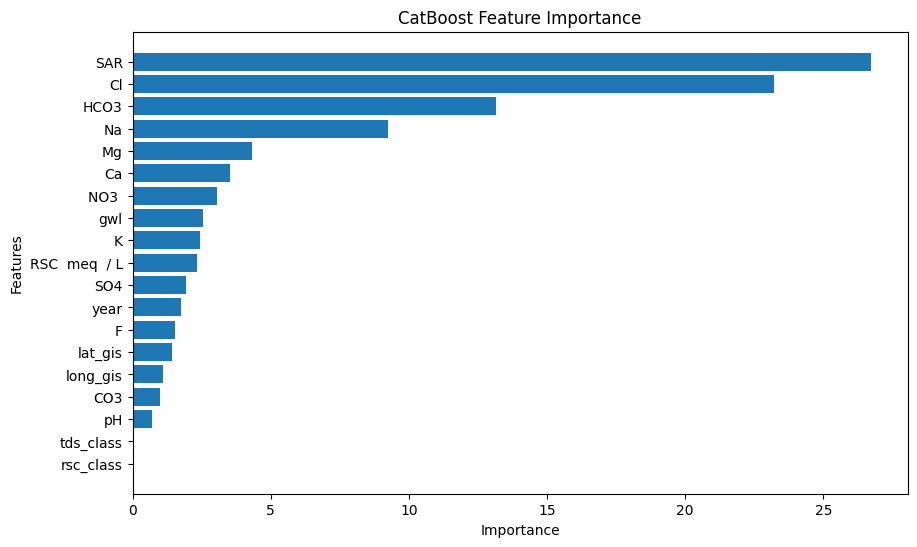

In [272]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [273]:
cb_model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'MultiClass',
 'iterations': 100,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'class_names': [0, 1, 2, 3, 4, 5],
 'random_seed': 0,
 'depth': 6,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class

In [274]:
# x = [False, True, False, True, True, False, False, False, True, True, True, True, True, True, False, False, False, False, False]
x = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
selected_features = x
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
train_pool_select = Pool(X_train_selected, y_train, cat_features = cat_feat_idx)
test_pool_select = Pool(X_test_selected, y_test, cat_features = cat_feat_idx)

## Swarm Intelligence

In [275]:
import pyswarms as ps
from mealpy import FloatVar, IntegerVar, PSO

In [289]:
labels = [0, 1, 2, 3, 4, 5]

### Hyperparameter Optimization

In [290]:
def objective_function_cb(x):
    # x = x.astype(int)
    x = x.reshape(-1)
    params = {
        'iterations': int(x[0]),
        'depth': int(x[1]),
        'learning_rate': float(x[2]),
        'min_data_in_leaf': int(x[3]),
        'l2_leaf_reg': float(x[4]),
        'random_strength': float(x[5]),
        'eval_metric':'TotalF1',
        # 'eval_metric': 'AUC',
        # 'one_hot_max_size': 254,
        # 'class_weights': class_weights,
        'task_type': device_type,
        'devices': '0:1',
        'cat_features': cat_feat_idx,
        'verbose': 0,
    }

    cbof_model = CatBoostClassifier(**params)
    cbof_model.fit(train_pool_select, early_stopping_rounds=20)
    y_pred = cbof_model.predict(test_pool_select)
    f1score = f1_score(y_test, y_pred, average="macro")
    return f1score

In [291]:

problem_dict_cb = {
    "bounds": FloatVar(lb=(10, 2, 0.001, 10, 0.1, 0.0), ub=(100, 10, 0.9, 35, 30.0, 10.0), name="delta"),
    "minmax": "max",
    "obj_func": objective_function_cb,
}

#### PSO

In [292]:
model_pso_cb = PSO.OriginalPSO(epoch=100, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_pso_cb = model_pso_cb.solve(problem_dict_cb)

2023-11-28 09:46:17,170 - mealpy.swarm_based.PSO.OriginalPSO - INFO - Solving single objective optimization problem.
2023-11-28 09:46:53,590 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 1, Current best: 0.8917077520845637, Global best: 0.8917077520845637, Runtime: 15.27338 seconds
2023-11-28 09:47:13,176 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 2, Current best: 0.8953670981349514, Global best: 0.8953670981349514, Runtime: 19.58360 seconds
2023-11-28 09:47:33,143 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 3, Current best: 0.8975045416406324, Global best: 0.8975045416406324, Runtime: 19.96590 seconds
2023-11-28 09:47:48,596 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 4, Current best: 0.8975045416406324, Global best: 0.8975045416406324, Runtime: 15.44964 seconds
2023-11-28 09:48:04,534 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 5, Current best: 0.8994139716767336, Gl

In [293]:
print(f"Solution: {g_best_pso_cb.solution}, Fitness: {g_best_pso_cb.target.fitness}")

Solution: [95.32229897  9.65746918  0.29810339 13.93448272  2.86884609  5.68677016], Fitness: 0.9195828119599884


In [294]:
len(g_best_pso_cb.solution)

6

In [295]:
best_param_pso_cb = g_best_pso_cb.solution
# best_param_pso_cb = [1497, 5, 0.041715994948692686, 23, 0.19786526945302252]

In [296]:
import json
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%d-%m-%Y")

# Convert the best_param_pso_cb to a list
best_param_pso_cb_list = best_param_pso_cb.tolist()

# Convert the list to JSON format
best_param_pso_cb_json = json.dumps(best_param_pso_cb_list)

# Save the JSON data to a file with the current date in the filename
filename = f'best_param_pso_cb_{current_date}.json'
with open(filename, 'w') as file:
    file.write(best_param_pso_cb_json)

In [297]:
print("Best hyperparameters:", g_best_pso_cb.target.fitness)
print("iteration:", int(g_best_pso_cb.solution[0]))
print("depth:", int(g_best_pso_cb.solution[1]))
print("learning_rate:", float(g_best_pso_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_pso_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_pso_cb.solution[4]))
print("random_strength:", float(g_best_pso_cb.solution[5]))


Best hyperparameters: 0.9195828119599884
iteration: 95
depth: 9
learning_rate: 0.29810338888200527
min_data_in_leaf: 13
l2_leaf_reg: 2.868846092036367
random_strength: 5.68677015891476


In [298]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_pso_cb = {
    'iterations': int(best_param_pso_cb[0]),
    'depth': int(best_param_pso_cb[1]),
    'learning_rate': float(best_param_pso_cb[2]),
    'min_data_in_leaf': int(best_param_pso_cb[3]),
    "l2_leaf_reg": float(best_param_pso_cb[4]),
    'random_strength': float(best_param_pso_cb[5]),
    # 'eval_metric': 'AUC',
    # 'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [299]:
pso_cb_model = CatBoostClassifier(**best_hyperparameters_pso_cb)
pso_cb_model.fit(train_pool_select , verbose = 1000 )

0:	learn: 0.9298260	total: 47.8ms	remaining: 4.49s
94:	learn: 0.0234389	total: 1.46s	remaining: 0us


In [300]:
importances = pso_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train_selected.columns).sort_values()

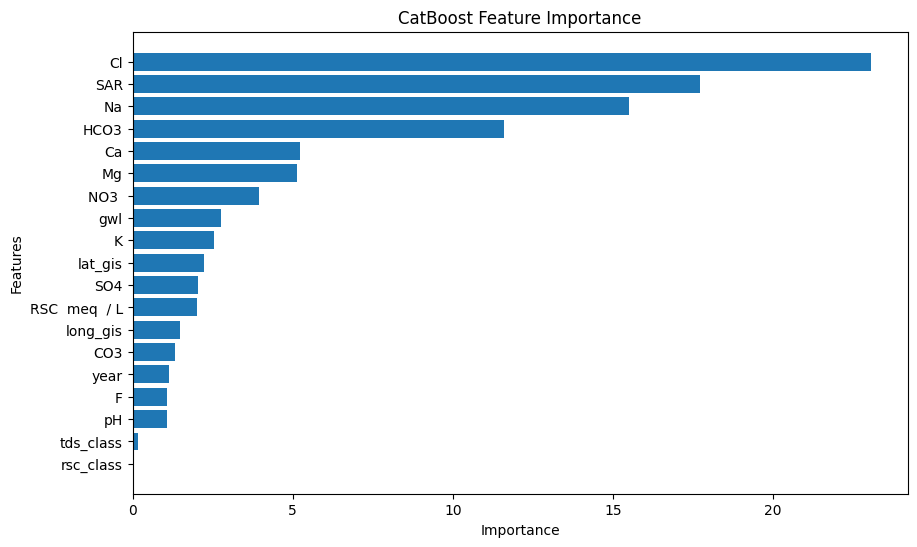

In [301]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Sparrow Search Algorithm

In [302]:
from mealpy import FloatVar, SSA

In [303]:
model_ssa_cb = SSA.OriginalSSA(epoch=100, pop_size=20, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_ssa_cb = model_ssa_cb.solve(problem_dict_cb)

2023-11-28 10:28:47,022 - mealpy.swarm_based.SSA.OriginalSSA - INFO - Solving single objective optimization problem.
2023-11-28 10:30:16,785 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 1, Current best: 0.8935255932062628, Global best: 0.8935255932062628, Runtime: 63.55512 seconds
2023-11-28 10:31:34,238 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 2, Current best: 0.8947892821623848, Global best: 0.8947892821623848, Runtime: 77.45110 seconds
2023-11-28 10:32:38,495 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 3, Current best: 0.8999100936251835, Global best: 0.8999100936251835, Runtime: 64.25375 seconds
2023-11-28 10:33:52,800 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 4, Current best: 0.8999100936251835, Global best: 0.8999100936251835, Runtime: 74.30314 seconds
2023-11-28 10:34:56,761 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 5, Current best: 0.8999100936251835, Gl

In [304]:
print(f"Solution: {g_best_ssa_cb.solution}, Fitness: {g_best_ssa_cb.target.fitness}")

Solution: [73.16480696  7.8946382   0.29887756 31.40668751  0.11514515  0.19453745], Fitness: 0.9375039105010928


In [305]:
best_param_ssa_cb = g_best_ssa_cb.solution

In [306]:
print("Best hyperparameters:", g_best_ssa_cb.target.fitness)
print("iteration:", int(g_best_ssa_cb.solution[0]))
print("depth:", int(g_best_ssa_cb.solution[1]))
print("learning_rate:", float(g_best_ssa_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_ssa_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_ssa_cb.solution[4]))
print("random_strength:", float(g_best_ssa_cb.solution[5]))

Best hyperparameters: 0.9375039105010928
iteration: 73
depth: 7
learning_rate: 0.2988775626450982
min_data_in_leaf: 31
l2_leaf_reg: 0.11514515336927386
random_strength: 0.19453745449308357


In [307]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_ssa_cb = {
    'iterations': int(best_param_ssa_cb[0]),
    'depth': int(best_param_ssa_cb[1]),
    'learning_rate': float(best_param_ssa_cb[2]),
    'min_data_in_leaf': int(best_param_ssa_cb[3]),
    "l2_leaf_reg": float(best_param_ssa_cb[4]),
    'random_strength': float(best_param_ssa_cb[5]),
    # 'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [308]:
import json
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%d-%m-%Y")

# Convert the best_param_pso_cb to a list
best_param_ssa_cb_list = best_param_ssa_cb.tolist()

# Convert the list to JSON format
best_param_ssa_cb_json = json.dumps(best_param_ssa_cb_list)

# Save the JSON data to a file with the current date in the filename
filename = f'best_param_ssa_cb_{current_date}.json'
with open(filename, 'w') as file:
    file.write(best_param_ssa_cb_json)

In [309]:
# Create a CatBoost classifier with the best hyperparameters
ssa_cb_model = CatBoostClassifier(**best_hyperparameters_ssa_cb)

# Train the model on your training data
ssa_cb_model.fit(train_pool_select , verbose = 1000 )

0:	learn: 0.8877824	total: 14.1ms	remaining: 1.01s


72:	learn: 0.0099293	total: 916ms	remaining: 0us


In [310]:
importances = ssa_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train_selected.columns).sort_values()

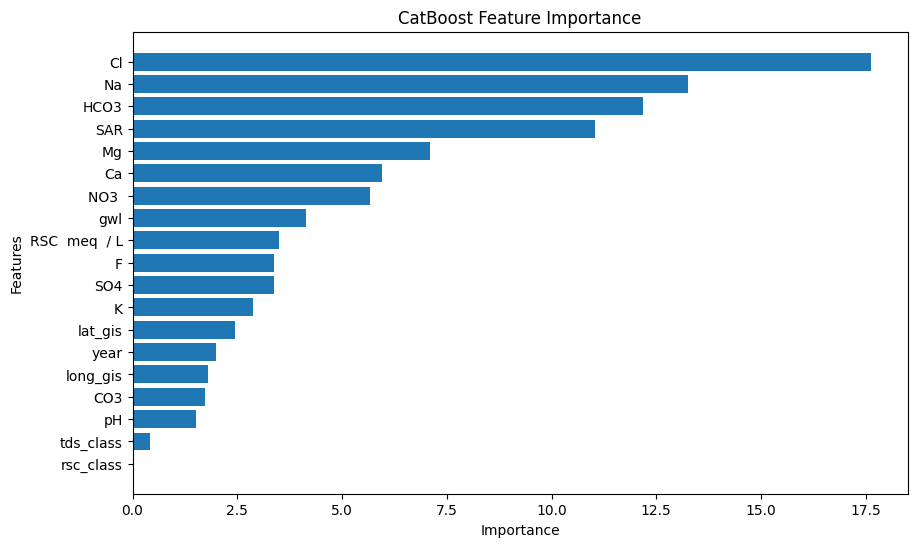

In [311]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# <span style="color:#e74c3c;"> Results </span>


In [312]:
from sklearn.metrics import roc_curve, auc

### Cat Boost Base Model

In [313]:
# predictions and scores

pred = cb_model.predict(test_pool)


r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.78498
Mean Squared Error :0.14107


In [314]:
# classification report

clf_report_cb = classification_report(pred, y_test)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       273
           1       0.95      0.97      0.96       741
           2       0.92      0.88      0.90       124
           3       0.91      0.79      0.85        39
           4       1.00      0.62      0.77         8
           5       0.86      0.92      0.89        13

    accuracy                           0.94      1198
   macro avg       0.93      0.85      0.88      1198
weighted avg       0.94      0.94      0.94      1198



### With SI

#### Catboost

#### PSO

In [315]:
# predictions and scores

pred = pso_cb_model.predict(test_pool_select)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.83460
Mean Squared Error :0.10851


In [316]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       267
           1       0.96      0.98      0.97       750
           2       0.92      0.91      0.91       119
           3       0.91      0.78      0.84        40
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00        14

    accuracy                           0.96      1198
   macro avg       0.96      0.87      0.91      1198
weighted avg       0.96      0.96      0.96      1198



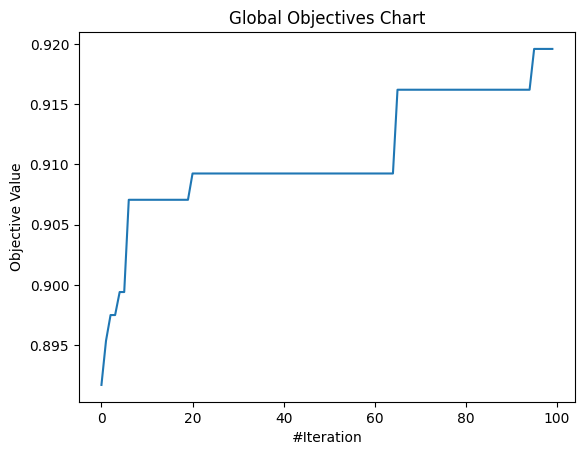

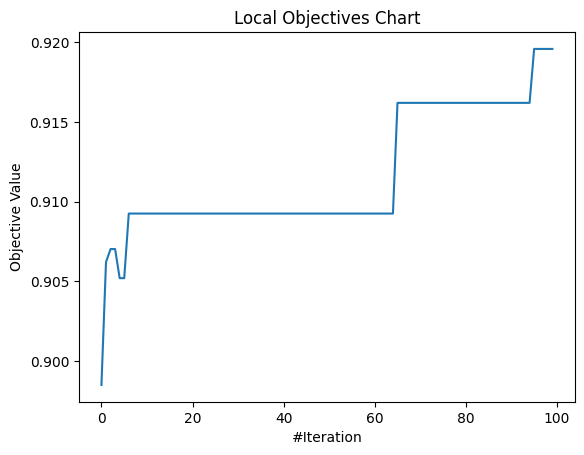

In [317]:
model_pso_cb.history.save_global_objectives_chart(filename="pso/goc")
model_pso_cb.history.save_local_objectives_chart(filename="pso/loc")

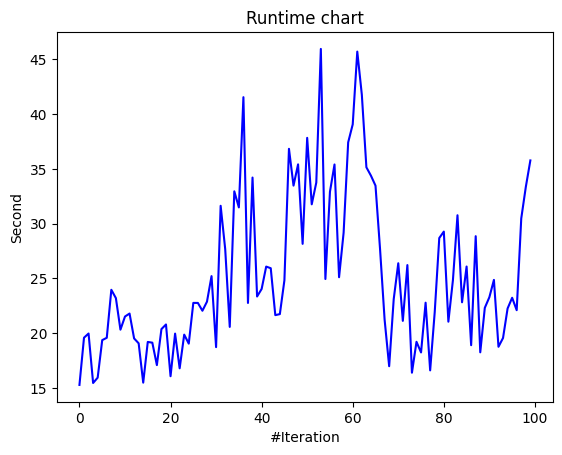

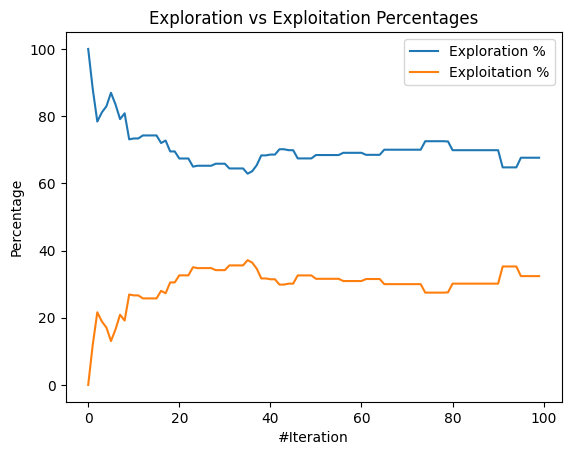

In [318]:
model_pso_cb.history.save_runtime_chart(filename="pso/rtc")
model_pso_cb.history.save_exploration_exploitation_chart(filename="pso/eec")

#### SSA

In [319]:
# predictions and scores

pred = ssa_cb_model.predict(test_pool_select)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.88167
Mean Squared Error :0.07763


In [320]:
# classification report

clf_report = classification_report(pred, y_test)

print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       269
           1       0.96      0.98      0.97       749
           2       0.92      0.91      0.92       120
           3       0.94      0.80      0.86        40
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00        14

    accuracy                           0.96      1198
   macro avg       0.97      0.91      0.94      1198
weighted avg       0.96      0.96      0.96      1198



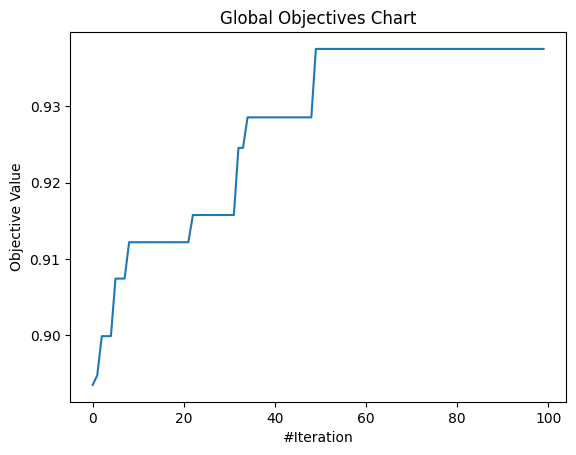

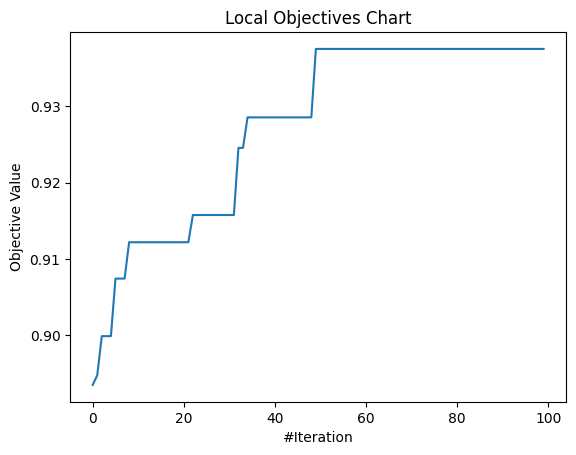

In [321]:
model_ssa_cb.history.save_global_objectives_chart(filename="ssa/goc")
model_ssa_cb.history.save_local_objectives_chart(filename="ssa/loc")

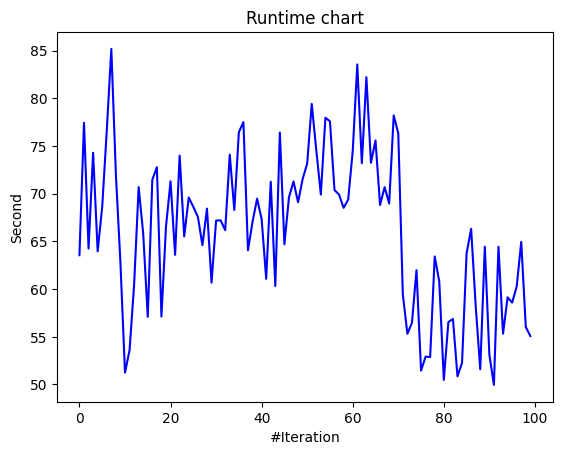

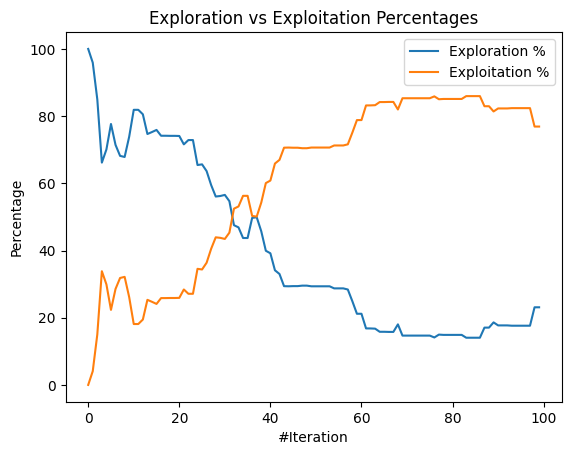

In [322]:
model_ssa_cb.history.save_runtime_chart(filename="ssa/rtc")
model_ssa_cb.history.save_exploration_exploitation_chart(filename="ssa/eec")

## Save Model

### Base Model

In [328]:
cb_model.save_model('model/model_catboost.cbm',format="cbm")

### Base with SI

In [ ]:
pso_cb_model.save_model(f'model/model_pso_catboost_iter.cbm', format="cbm")

In [325]:
ssa_cb_model.save_model(f'model/model_ssa_catboost_iter.cbm', format="cbm")

# Load Model

In [326]:
from catboost import CatBoostClassifier, Pool

In [ ]:
from datetime import datetime

pso_cb_model = CatBoostClassifier()
ssa_cb_model = CatBoostClassifier()

# pso_cb_model.load_model(f'model/model_pso_catboost_iter.cbm')
# ssa_cb_model.load_model(f'model/model_ssa_catboost_iter.cbm')

# Save the models with date and time
current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
pso_cb_model.save_model(f'model/model_pso_catboost_{current_datetime}.cbm', format="cbm")
ssa_cb_model.save_model(f'model/model_ssa_catboost_{current_datetime}.cbm', format="cbm")
# ssa_cb_model.load_model(f'model/model_ssa_catboost_iter.cbm')